In [1]:
import nltk
import pandas as pd
import re
from matplotlib import pyplot as plt
from wordcloud import WordCloud
import matplotlib.colors as mcolors

nltk downloads should be put here!

In [2]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
  

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# Load Data

In [3]:
import pandas as pd
df = pd.read_csv('processed_final_Bernie.csv')

In [4]:
df.head()

,id_str,created_at,full_text
0,1200287500419375105,2019-11-29 05:36:55,Here is another reason why has a good chance ...
1,1200485829111513088,2019-11-29 18:45:00,These Dem Sens. r running against #Trump in #2...
2,1200208948852187136,2019-11-29 00:24:46,"Corporate Democrats are fond of saying ""I am a..."
3,1200538604755443713,2019-11-29 22:14:42,How can that be ? that is thieving you woul...
4,1200538573516218369,2019-11-29 22:14:35,Biden is a Corp bribed gateway political pupp...


In [5]:
df.shape

(19410, 3)

# Data-specific Preprocessing

In [6]:
stop_words = nltk.corpus.stopwords.words('english')


In [7]:
stop_words.extend(['from', 'subject', 're', 'use',"get",'like','want','way','must','yet','take','look','still','hey', 'lol', 'day', 'liz',
                  'thanks', 'part', 'plan', 'lol', 'since', 'ever', 'yes', 'word', 'please', 'think', 'thing', 'need', 'joke',
                  'let', 'things', 'tell', 'yeah',
                   'nothing', 'everyone', 'anyone'
                   
                  ])

In [8]:
# tokenize the tweets

from string import punctuation

def tokenize(text):
    '''names = ["berniesanders", "bernie", "sanders", "bern",
             "elizabethwarren","elizabeth","warren", 'ewarren'
             "joebiden","joe","biden",
             'donaldtrump', 'donald', 'trump',
             'aoc', 'cortez'
            ]'''
    lowered = nltk.tokenize.word_tokenize(text.lower())
    stripped = [i.strip().strip(punctuation) for i in lowered]
    tokenized = [t for t in lowered if t not in stop_words if len(t)>2] #if t not in names
    return tokenized

# Tokenization

In [9]:
data = df['full_text']

tokenized_data = []
for text in data:
    tokenized_data.append(tokenize(text))


# PoS Tagging

In [10]:
tagged_data = [nltk.pos_tag(t) for t in tokenized_data]

In [11]:
tagged_data[:5]

[[('another', 'DT'),
  ('reason', 'NN'),
  ('good', 'JJ'),
  ('chance', 'NN'),
  ('winning', 'VBG'),
  ('ask', 'JJ'),
  ('americans', 'NNS'),
  ('name', 'VBP'),
  ('one', 'CD'),
  ('politician', 'NN'),
  ('honest', 'NN'),
  ('thatwould', 'NN'),
  ('win', 'VB'),
  ('landslide', 'JJ'),
  ('notmeus', 'NN')],
 [('dem', 'NN'),
  ('sens', 'NNS'),
  ('running', 'VBG'),
  ('trump', 'NN'),
  ('2020elections', 'CD'),
  ('ewarren', 'JJ'),
  ('kamalaharris', 'FW'),
  ('michaelbennet', 'NN'),
  ('amyklobuchar', 'NN'),
  ('corybooker', 'NN'),
  ('sens', 'VBZ'),
  ('recuse', 'VBP'),
  ('sitting', 'VBG'),
  ('juror', 'NN'),
  ('senate', 'NN'),
  ('impeachment', 'NN'),
  ('trial', 'NN')],
 [('corporate', 'JJ'),
  ('democrats', 'NNS'),
  ('fond', 'VBP'),
  ('saying', 'VBG'),
  ('progressive', 'JJ'),
  ('gets', 'VBZ'),
  ('done', 'VBN'),
  ('familiar', 'JJ'),
  ('candidates', 'NNS'),
  ('records', 'NNS'),
  ('however', 'RB'),
  ('note', 'VBP'),
  ('presidential', 'JJ'),
  ('candidate', 'NN'),
  ('phrase'

# Lemmatization/Stemming

In [12]:
#from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import wordnet

def get_wordnet_pos(word, tag):
    """Map POS tag to first character lemmatize() accepts"""
    tag = tag[0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

#temmer = PorterStemmer()
#def get_stemmed_tokens(tokens):
#    token = []
#    for token_list in tokens:
#        texts = [p_stemmer.stem(i) for i in token_list if ]
#        token.append(texts)
#    return token

lemmatizer = WordNetLemmatizer()

tagnames = ['NN','NNS', 'NNP', 'NNPS'] # 'JJ', 'VB', 'VBG', 'VBN', 'VBP', 'VBZ
lemmatized_data = []

for tagged_doc in tagged_data:
    temp = []
    for t1, t2 in tagged_doc:
        if t2 in tagnames:
            temp.append(lemmatizer.lemmatize(t1, get_wordnet_pos(word=t1, tag=t2)))
    lemmatized_data.append(temp)

lemmatized_data[:5]

[['reason',
  'chance',
  'american',
  'politician',
  'honest',
  'thatwould',
  'notmeus'],
 ['dem',
  'sen',
  'trump',
  'michaelbennet',
  'amyklobuchar',
  'corybooker',
  'juror',
  'senate',
  'impeachment',
  'trial'],
 ['democrat', 'candidate', 'record', 'candidate', 'phrase', 'applies'],
 [],
 ['corp', 'puppet', 'racist', 'kleptocrats', 'terrorism', 'people', 'path']]

# Corpus Generation / Indexing

In [13]:
import gensim
from gensim import corpora


dictionary = corpora.Dictionary(lemmatized_data)
print(len(dictionary))

# filter for terms which occur in no less than 0.1% of the documents (here tweets) and no more than 0.9% of the documents (tweets)
dictionary.filter_extremes(no_below=20, no_above=0.5)

print(len(dictionary))



14698
911


In [14]:
doc_term_matrix = [dictionary.doc2bow(doc) for doc in lemmatized_data]

# LDA-Topic Model

In [15]:
topics_to_discover = 4

In [16]:

# Creating the object for LDA model using gensim library
lda_object = gensim.models.ldamodel.LdaModel

# Running and Trainign LDA model on the document term matrix.
model_lda = lda_object(doc_term_matrix, num_topics=topics_to_discover, id2word = dictionary,
                                passes=50, minimum_probability = 0.8,
                                random_state = 42)


In [17]:
model_lda.print_topics(num_topics=topics_to_discover, num_words=5)

[(0,
  '0.038*"tax" + 0.034*"government" + 0.032*"job" + 0.024*"pay" + 0.024*"union"'),
 (1,
  '0.025*"company" + 0.023*"policy" + 0.020*"party" + 0.020*"office" + 0.020*"time"'),
 (2,
  '0.105*"people" + 0.055*"money" + 0.019*"change" + 0.016*"life" + 0.015*"socialism"'),
 (3,
  '0.030*"vote" + 0.029*"trump" + 0.028*"candidate" + 0.028*"president" + 0.027*"bernie"')]

# Visualizations

In [18]:
import pyLDAvis
import pyLDAvis.gensim
vis = pyLDAvis.gensim.prepare(topic_model=model_lda, corpus=doc_term_matrix, dictionary=dictionary)
pyLDAvis.enable_notebook()
pyLDAvis.display(vis)

/usr/local/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


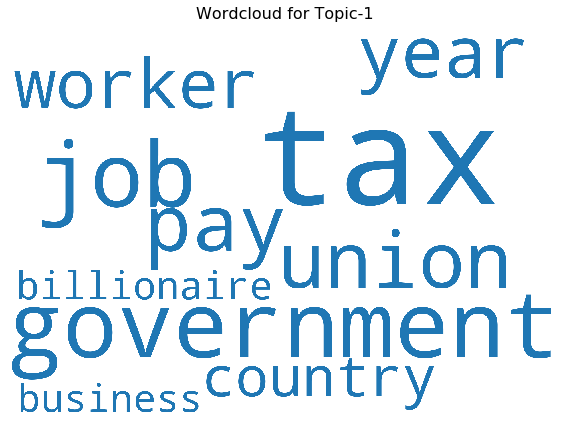

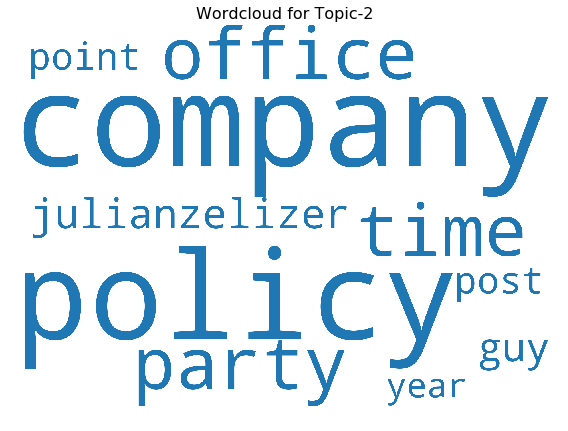

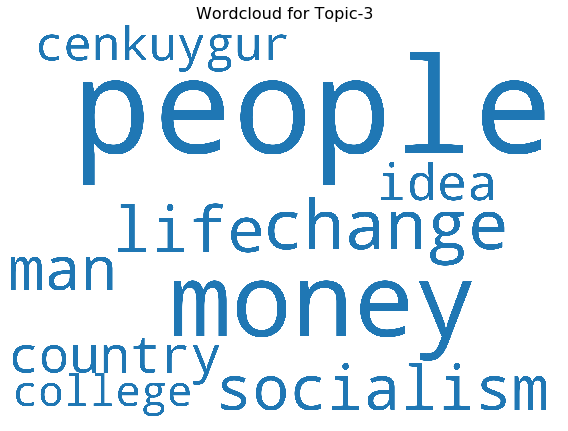

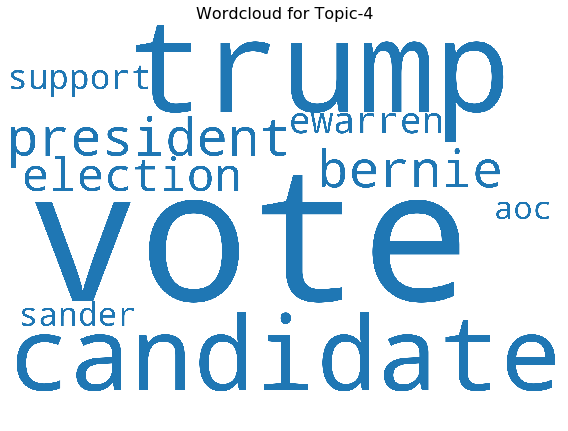

In [19]:
topics = model_lda.show_topics(formatted=False)
    
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[0],
                  prefer_horizontal=1.0)

for topic_num in range(topics_to_discover):
    fig, axes = plt.subplots(1, 1, figsize=(8,8), sharex=True, sharey=True)

    topic_words = dict(topics[topic_num][1])
    cloud.generate_from_frequencies(topic_words)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Wordcloud for Topic-{}'.format(topic_num+1), fontdict=dict(size=16))
    plt.gca().axis('off')


    plt.subplots_adjust(wspace=0, hspace=0)
    plt.axis('off')
    plt.margins(x=0, y=0)
    plt.tight_layout()
    plt.show()